In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import linregress

In [2]:
import sys
import os

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

from lls import LLS

In [3]:
np.random.seed(42)

hours = np.random.uniform(1, 10, 400)
hours = np.round(hours / 0.5) * 0.5
noise = np.random.normal(0, 2, hours.shape)
grade = 2 * hours + noise
grade = np.clip(grade, 0, 20)
grade = np.round(grade / 0.25) * 0.25

In [4]:
hours

array([ 4.5,  9.5,  7.5,  6.5,  2.5,  2.5,  1.5,  9. ,  6.5,  7.5,  1. ,
        9.5,  8.5,  3. ,  2.5,  2.5,  3.5,  5.5,  5. ,  3.5,  6.5,  2.5,
        3.5,  4.5,  5. ,  8. ,  3. ,  5.5,  6.5,  1.5,  6.5,  2.5,  1.5,
        9.5,  9.5,  8.5,  3.5,  2. ,  7. ,  5. ,  2. ,  5.5,  1.5,  9. ,
        3.5,  7. ,  4. ,  5.5,  6. ,  2.5,  9.5,  8. ,  9.5,  9. ,  6.5,
        9.5,  2. ,  3. ,  1.5,  4. ,  4.5,  3.5,  8.5,  4. ,  3.5,  6. ,
        2.5,  8. ,  1.5, 10. ,  8. ,  3. ,  1. ,  8.5,  7.5,  7.5,  8. ,
        1.5,  4. ,  2. ,  9. ,  6.5,  4. ,  1.5,  4. ,  4. ,  7.5,  6.5,
        9. ,  5. ,  2. ,  7.5,  8. ,  6. ,  8. ,  5.5,  5.5,  5. ,  1. ,
        2. ,  1.5,  6.5,  4. ,  5.5,  9. ,  3. ,  4.5,  8. ,  3. ,  1.5,
        3.5,  2.5,  9.5,  8.5,  6.5,  9. ,  8. ,  2.5,  9. ,  6. ,  8.5,
        9. ,  4. ,  2. ,  3. ,  5. ,  8.5,  8.5,  1. ,  5.5,  5. ,  3. ,
        2. ,  4. ,  9.5,  4. ,  5.5,  7.5,  4.5,  9.5,  9.5,  3.5,  5.5,
        3.5,  3.5,  1.5,  6.5,  5.5,  1.5,  3.5,  9

In [5]:
grade

array([11.5 , 19.  , 16.25, 12.5 ,  5.75,  4.75,  3.25, 19.25, 11.25,
       19.25,  0.  , 16.5 , 19.25,  7.5 ,  6.25,  6.25,  7.  ,  9.25,
       10.25,  5.75, 15.  ,  4.75,  5.25,  8.25, 10.75, 14.75,  4.25,
       11.5 , 13.5 ,  2.  , 12.  ,  5.5 ,  0.  , 16.25, 17.5 , 16.5 ,
        7.5 ,  7.  , 15.75,  9.75,  4.  ,  9.  ,  3.  , 17.5 ,  7.75,
       12.25,  9.  , 14.  , 11.75,  5.75, 20.  , 15.25, 19.5 , 18.  ,
       13.25, 17.5 ,  4.  ,  7.  ,  6.  , 10.  , 13.25,  5.5 , 18.75,
        8.25, 11.5 , 10.5 ,  3.25, 14.75,  0.  , 19.  , 14.5 ,  6.25,
        2.75, 20.  , 17.  , 13.75, 14.25,  4.  ,  5.25,  7.75, 20.  ,
       12.  ,  4.5 ,  5.75,  7.75, 10.5 , 11.75, 11.75, 18.  , 10.  ,
        3.  , 16.25, 13.75, 11.75, 16.25, 12.  , 12.5 ,  7.75,  0.  ,
        6.5 ,  3.75, 11.5 , 11.  , 11.25, 20.  ,  6.25, 13.  , 19.5 ,
        5.5 ,  5.  ,  8.25,  7.75, 17.  , 18.25, 15.  , 14.5 , 13.75,
        1.  , 17.5 , 13.5 , 20.  , 18.25, 11.25,  1.25,  2.5 , 10.  ,
       17.75, 17.  ,

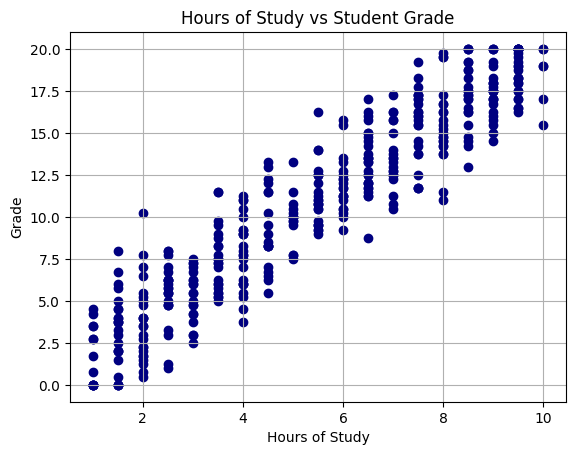

In [6]:
plt.scatter(hours,grade , color='navy')
plt.title("Hours of Study vs Student Grade")
plt.xlabel("Hours of Study")
plt.ylabel("Grade")
plt.grid(True)
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(hours,grade, test_size=.2)

In [8]:
X_train = X_train.reshape(-1,1)

In [9]:
X_train.shape

(320, 1)

In [10]:
y_train.shape

(320,)

In [11]:
lls = LLS()
lls.fit(X_train,y_train)
w = lls.w

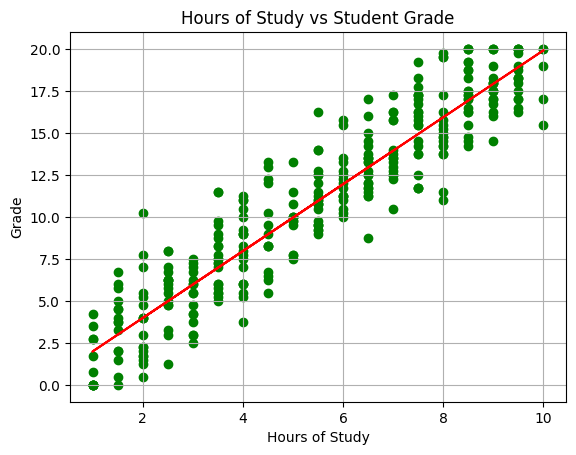

In [12]:
plt.scatter(X_train , y_train , color='green')
plt.title("Hours of Study vs Student Grade")
plt.plot(X_train , X_train * w , c='red')
plt.xlabel("Hours of Study")
plt.ylabel("Grade")
plt.grid(True)
plt.show()

In [13]:
slope, intercept, r, p, std_err = linregress(hours , grade)

mymodel = []
for hours in X_train:
    grade = slope * hours + intercept
    mymodel.append(grade)

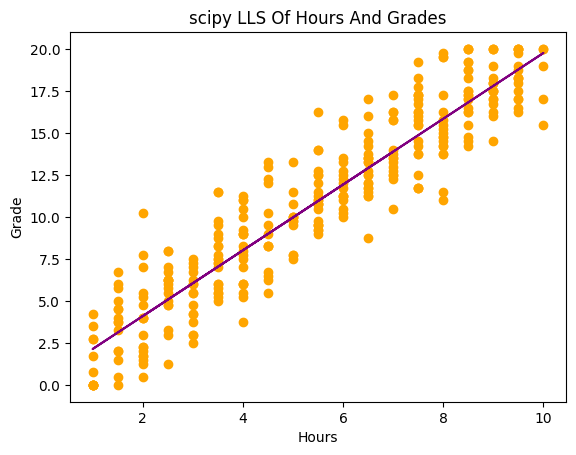

In [14]:
plt.scatter(X_train , y_train , c='orange')
plt.plot(X_train , mymodel , c="purple")
plt.title("scipy LLS Of Hours And Grades")
plt.xlabel("Hours")
plt.ylabel("Grade")
plt.show()